In [11]:
# %matplotlib inline
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import math
import os;
import seaborn as sns
from health.utils import  load_training_data ,  slugify,clean_str_data, column_encoder, EXEC_MODE, STR_COLS

%reload_ext autoreload
%autoreload 2

TARGET='Depression'

df = load_training_data()
print("total rows",len(df)) 
# print(df['Sleep Duration'].unique())

column_names = df.keys().to_list()
column_names.remove('id')
 


total rows 140700


In [12]:

# Print the count of each distinct value in each column



for column in column_names:
    
    slug = slugify(column); 
    print(f"Counts for column '{column}':")
    stats = df[column].value_counts(sort=False);
    stats.sort_index()
    print(stats)
    print("\n")
    # break

print(df.info())
print(df.describe())


Counts for column 'Gender':
Gender
Male      77464
Female    63236
Name: count, dtype: int64


Counts for column 'Age':
Age
51.0    3927
38.0    4564
33.0    3140
22.0    2066
35.0    2834
23.0    2900
47.0    4199
53.0    4526
56.0    5246
55.0    2846
19.0    2634
49.0    5099
27.0    2613
37.0    2724
24.0    3355
18.0    3921
40.0    3094
52.0    2589
48.0    3695
25.0    2931
59.0    3781
34.0    2578
50.0    3439
26.0    2108
45.0    3535
39.0    3262
36.0    2703
28.0    3338
31.0    2560
42.0    3393
46.0    4080
57.0    4395
60.0    2501
41.0    3140
54.0    3928
20.0    3515
21.0    2742
29.0    3097
58.0    2932
43.0    3856
44.0    3217
32.0    1785
30.0    1912
Name: count, dtype: int64


Counts for column 'City':
City
Pune             5210
Vadodara         4568
Ghaziabad        3620
Agra             4684
Srinagar         5074
Surat            4636
Vasai-Virar      5765
Bhopal           3475
Kalyan           6591
Indore           4872
Meerut           5528
Varanasi        

Gender for Female     has   17.82%    11271,    63236
Gender for Male       has   18.45%    14296,    77464
Generated ../reports/v1/figures/gender.png chart
Age for       18.0 has   70.92%     2781,     3921
Age for       19.0 has   63.21%     1665,     2634
Age for       20.0 has   62.13%     2184,     3515
Age for       21.0 has   67.14%     1841,     2742
Age for       22.0 has   52.66%     1088,     2066
Age for       23.0 has   55.79%     1618,     2900
Age for       24.0 has   55.82%     1873,     3355
Age for       25.0 has   53.87%     1579,     2931
Age for       26.0 has   41.46%      874,     2108
Age for       27.0 has   51.93%     1357,     2613
Age for       28.0 has   52.87%     1765,     3338
Age for       29.0 has   46.27%     1433,     3097
Age for       30.0 has   32.32%      618,     1912
Age for       31.0 has   39.06%     1000,     2560
Age for       32.0 has   42.57%      760,     1785
Age for       33.0 has   29.84%      937,     3140
Age for       34.0 has   19

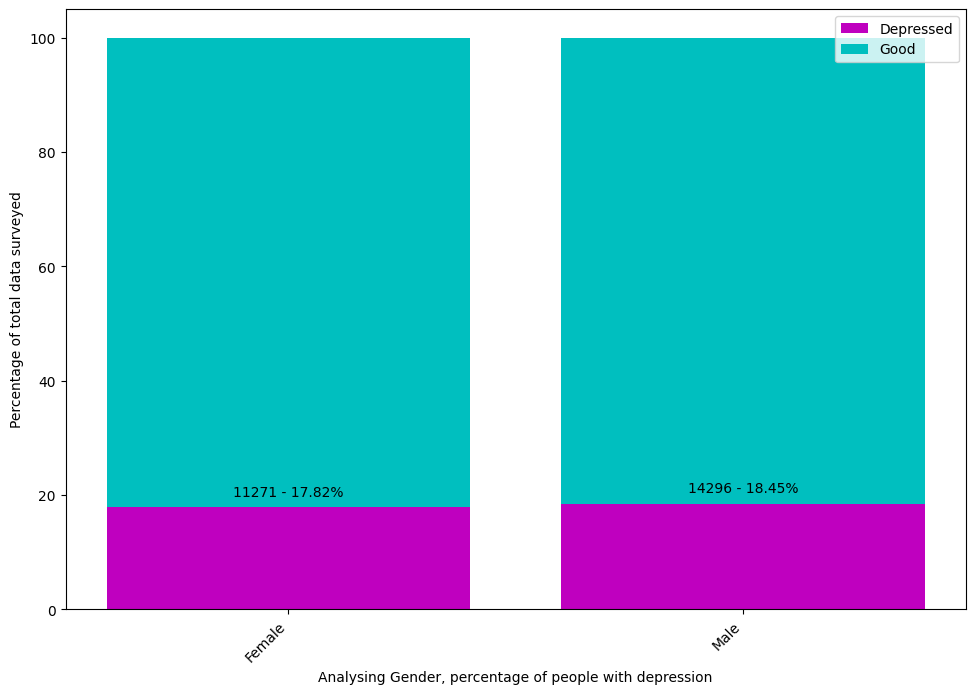

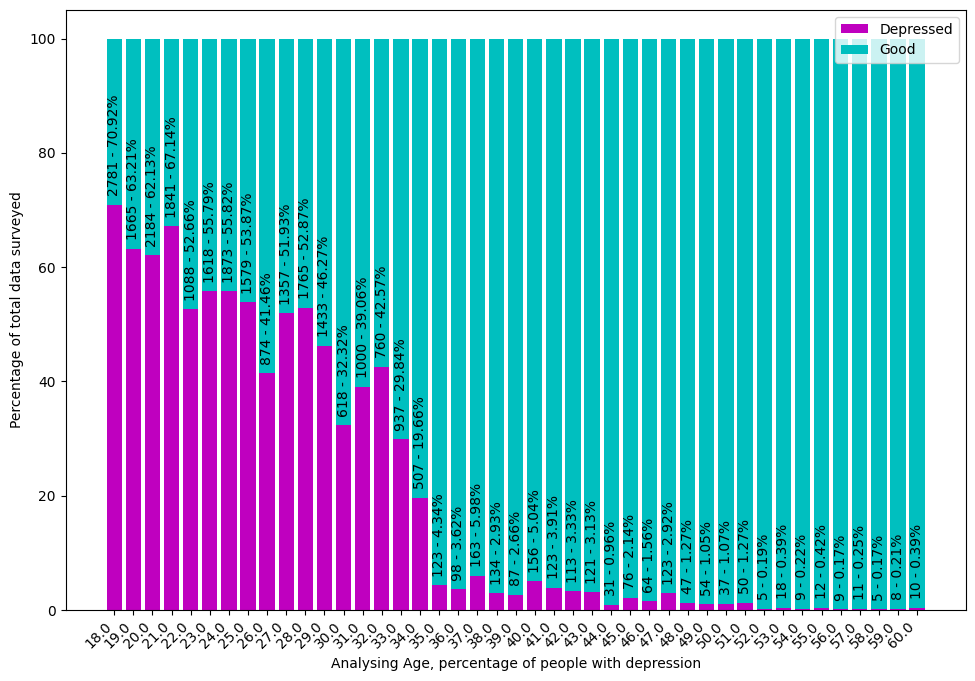

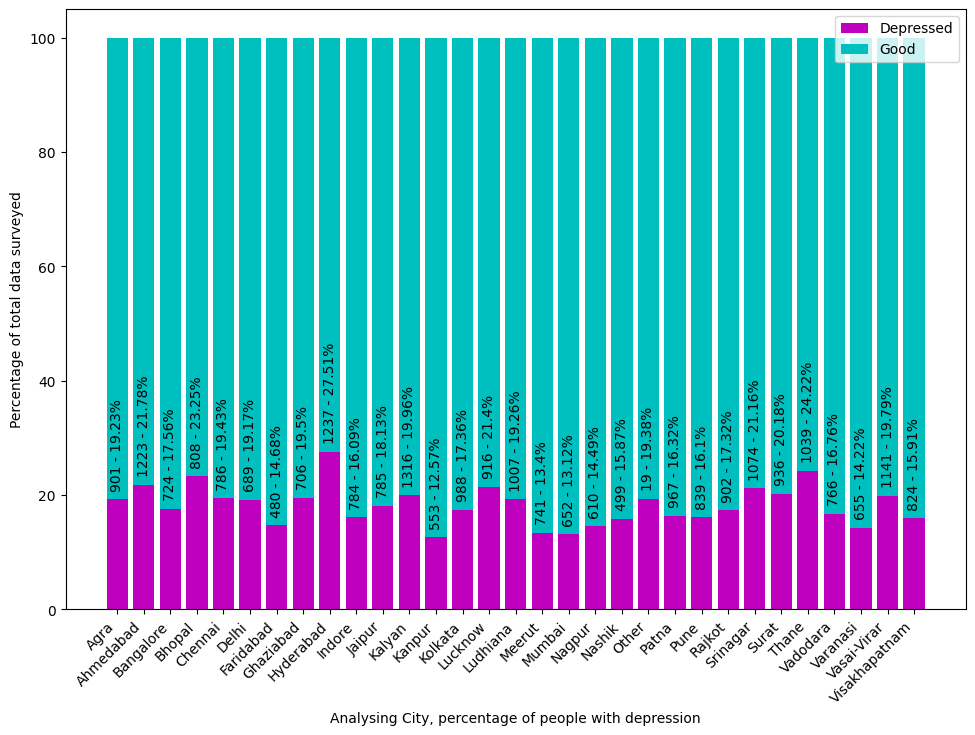

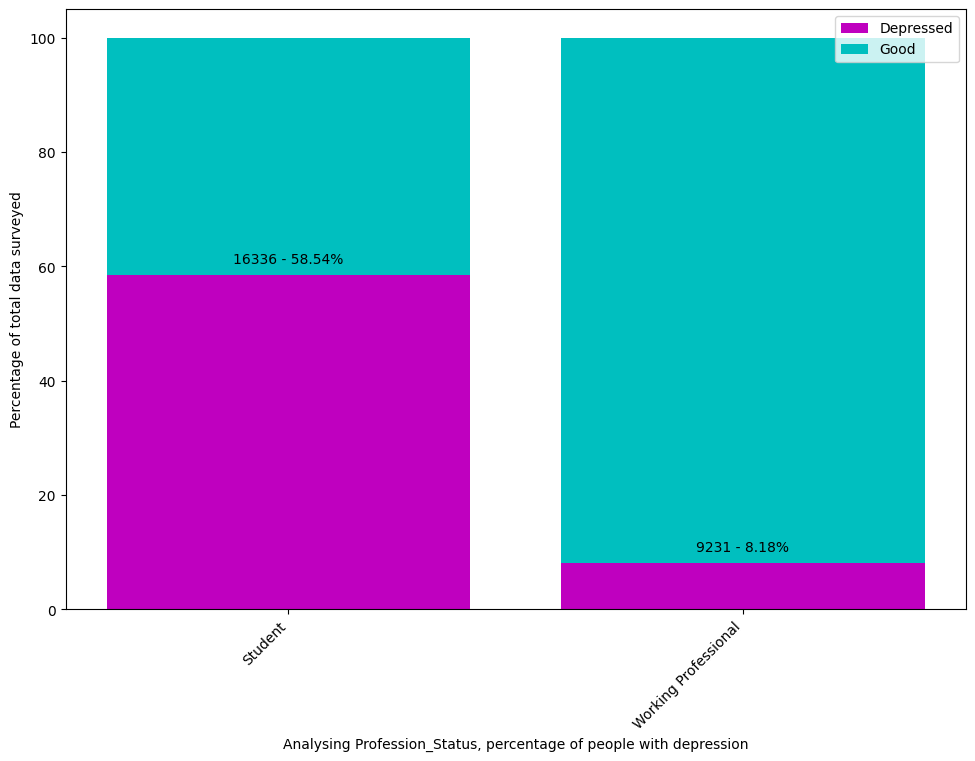

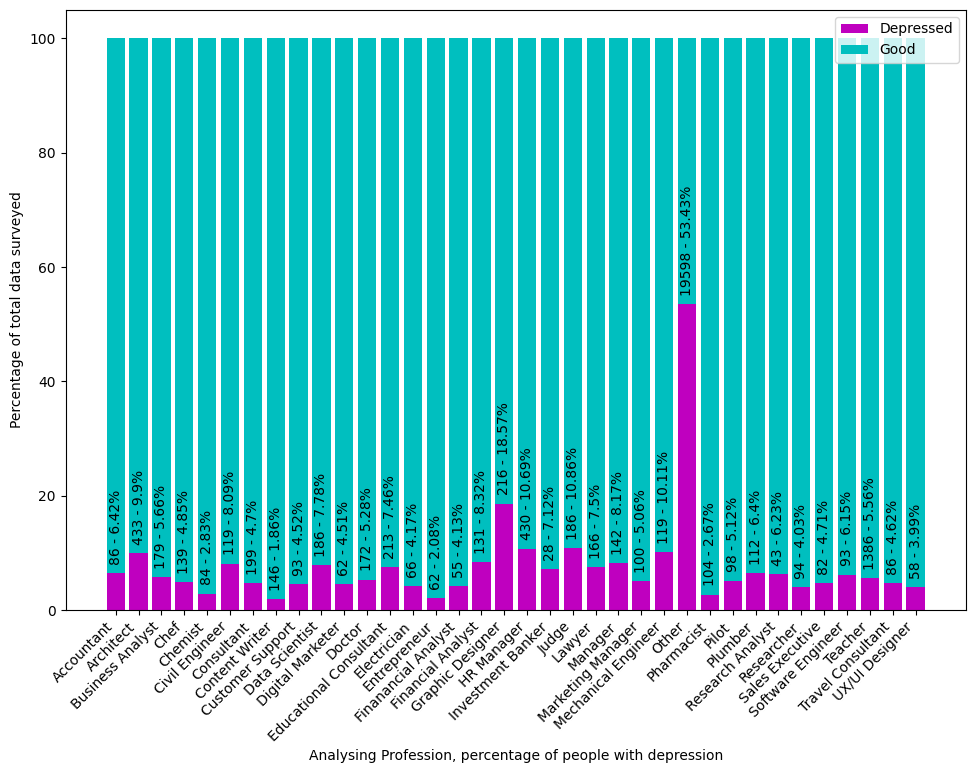

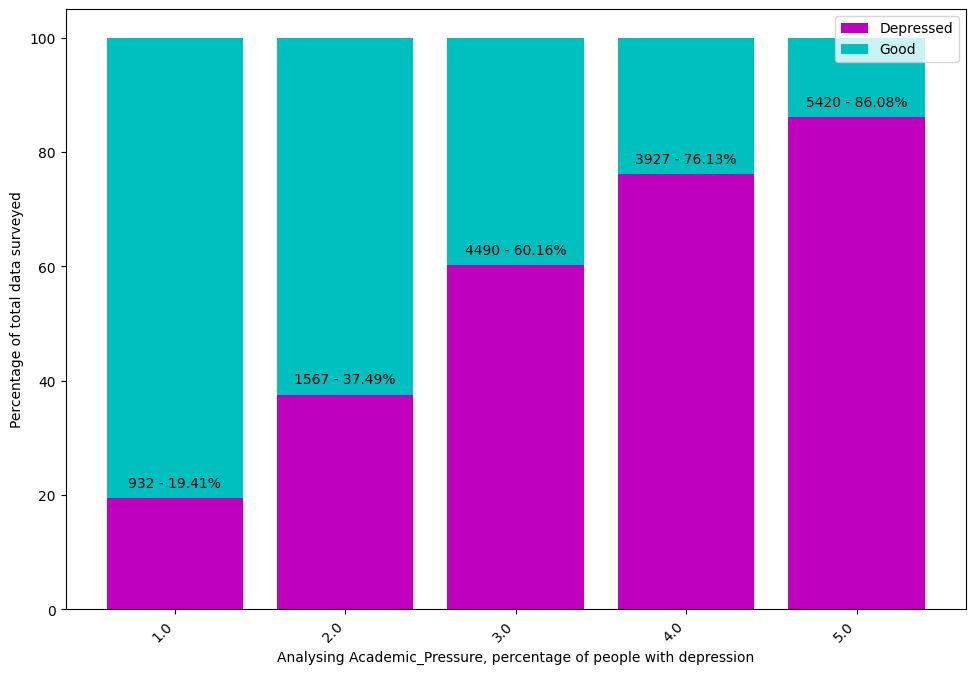

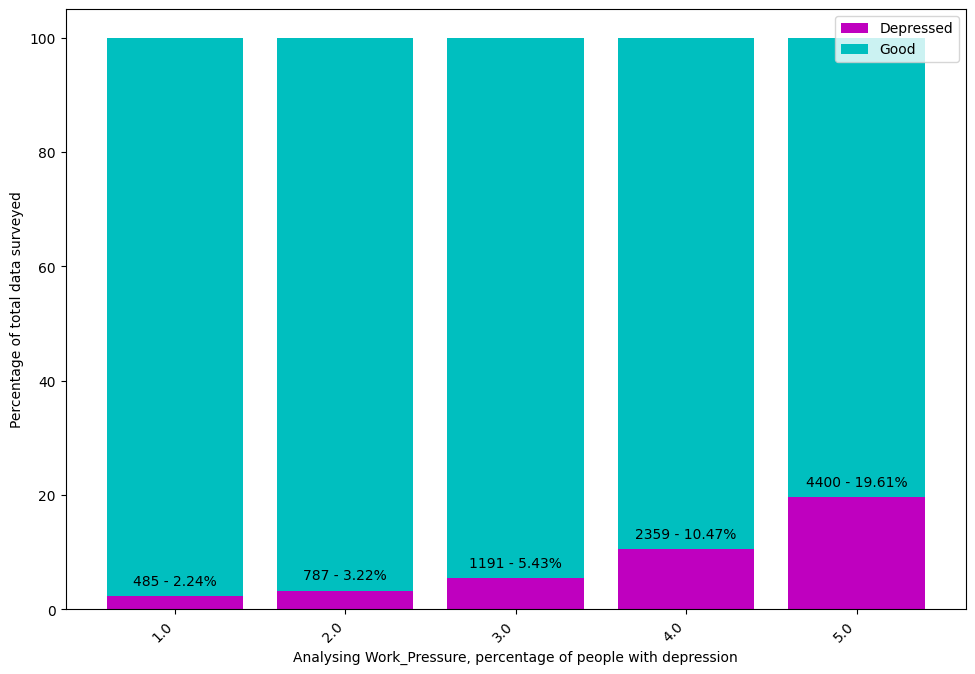

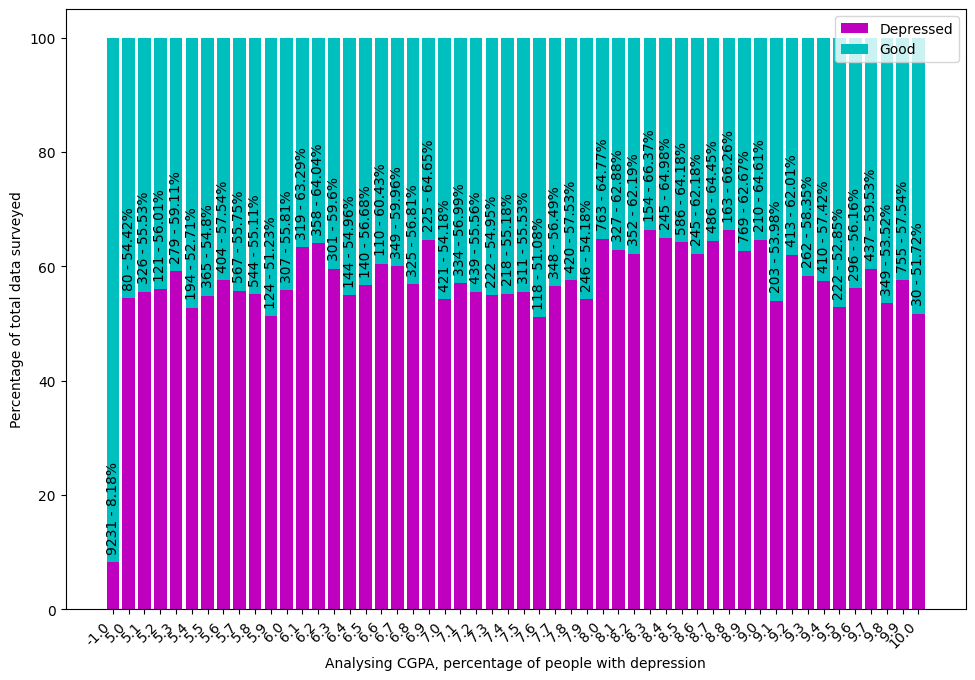

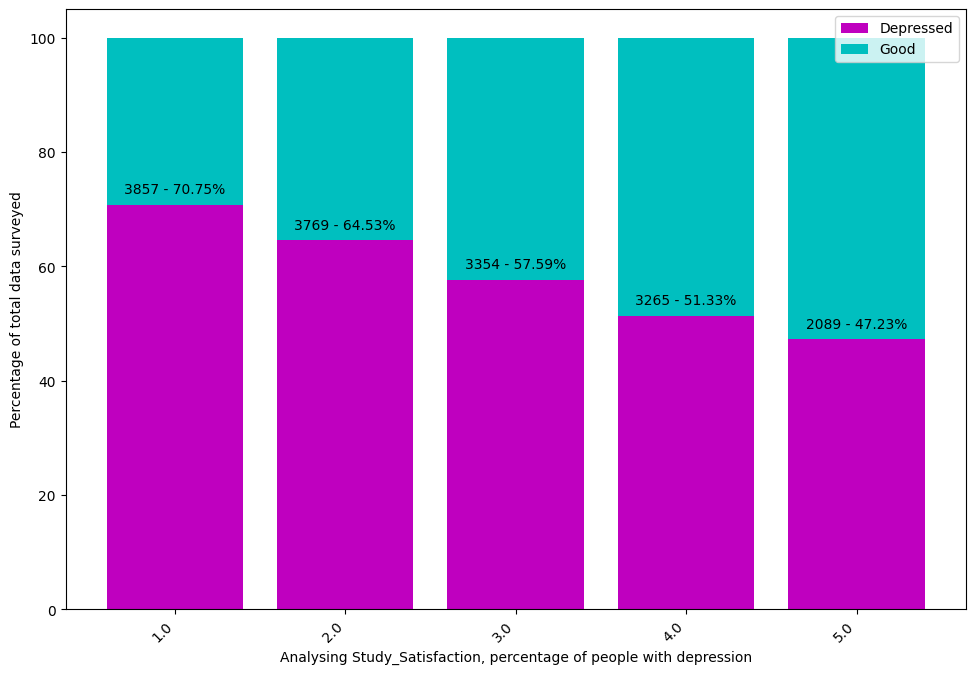

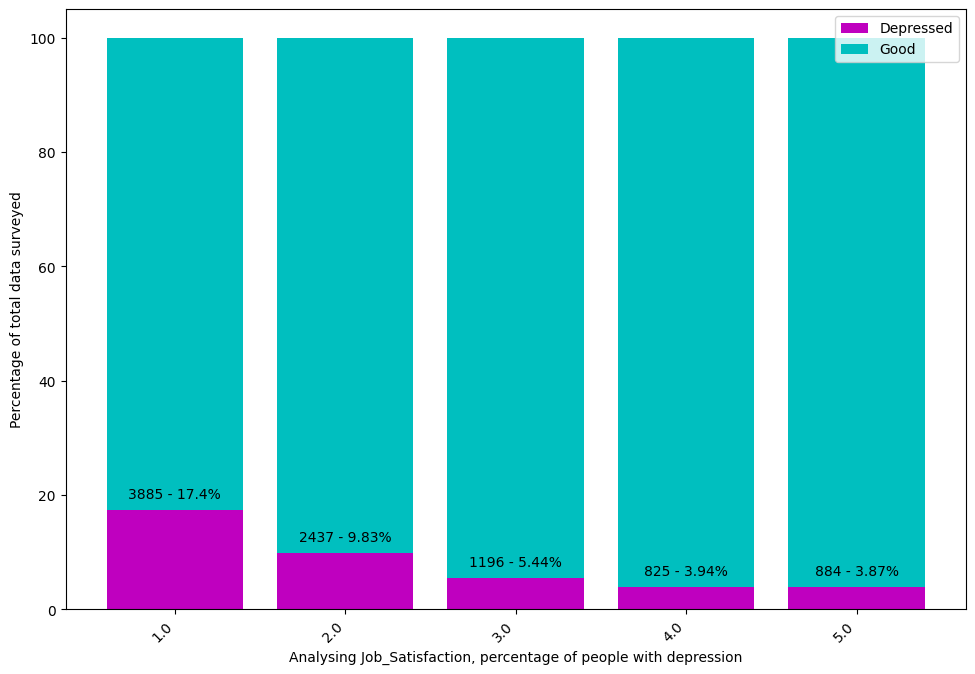

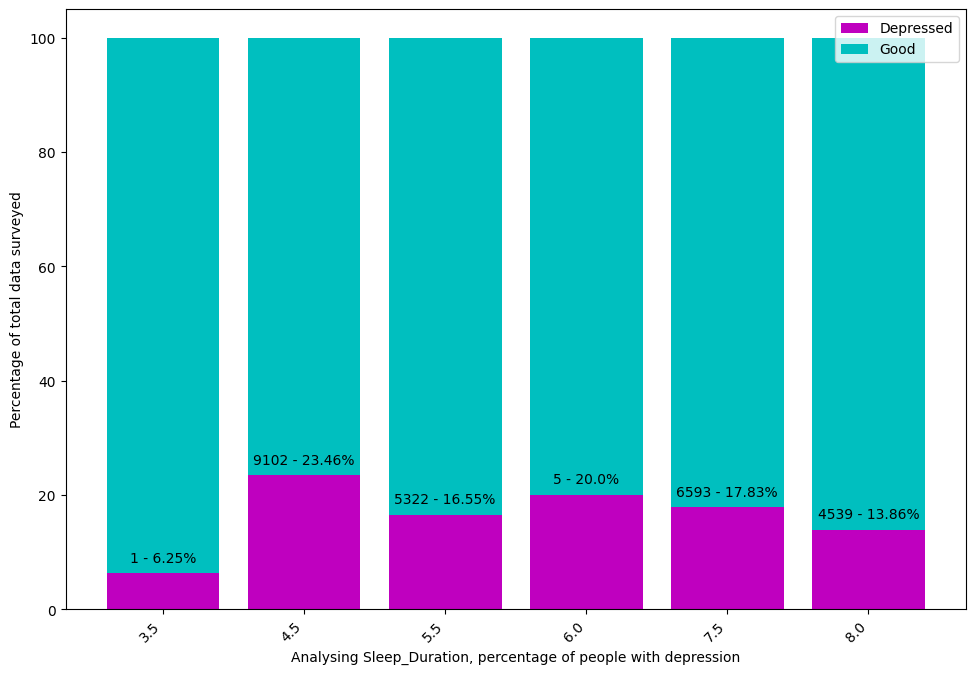

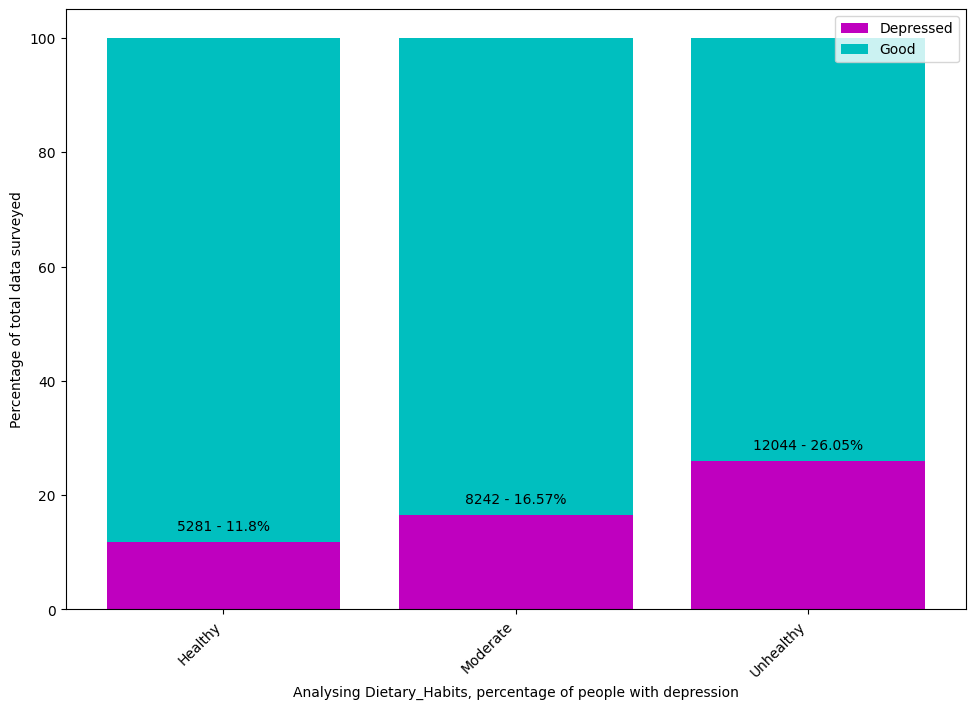

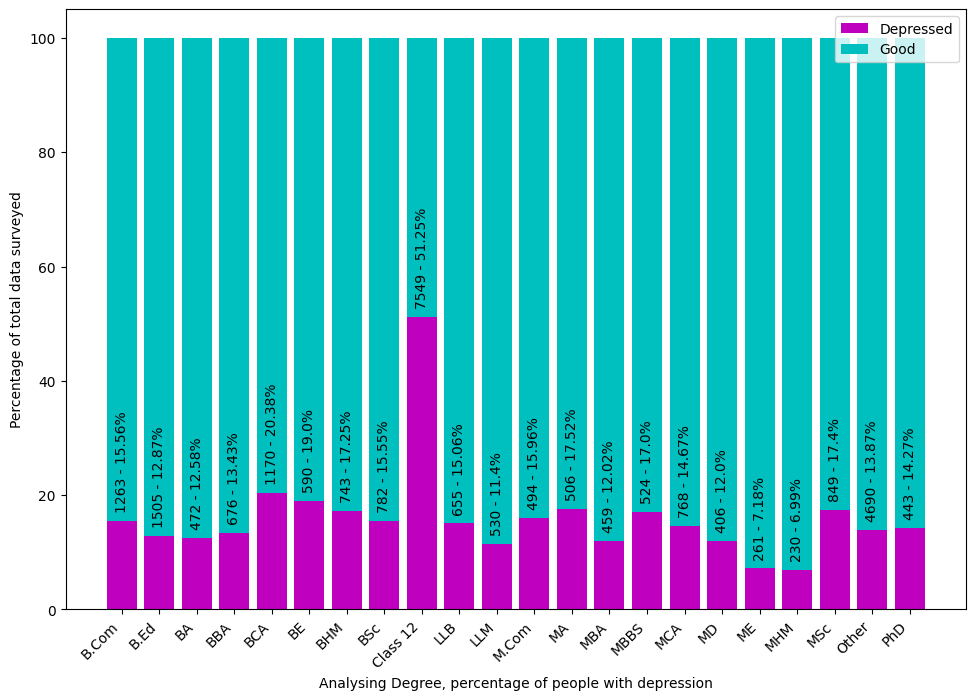

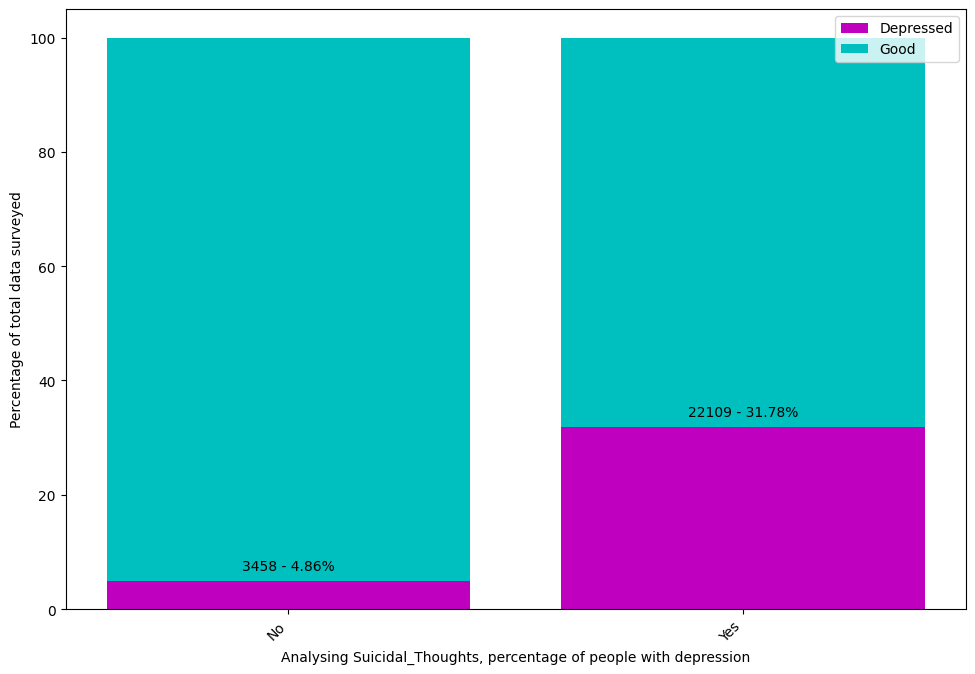

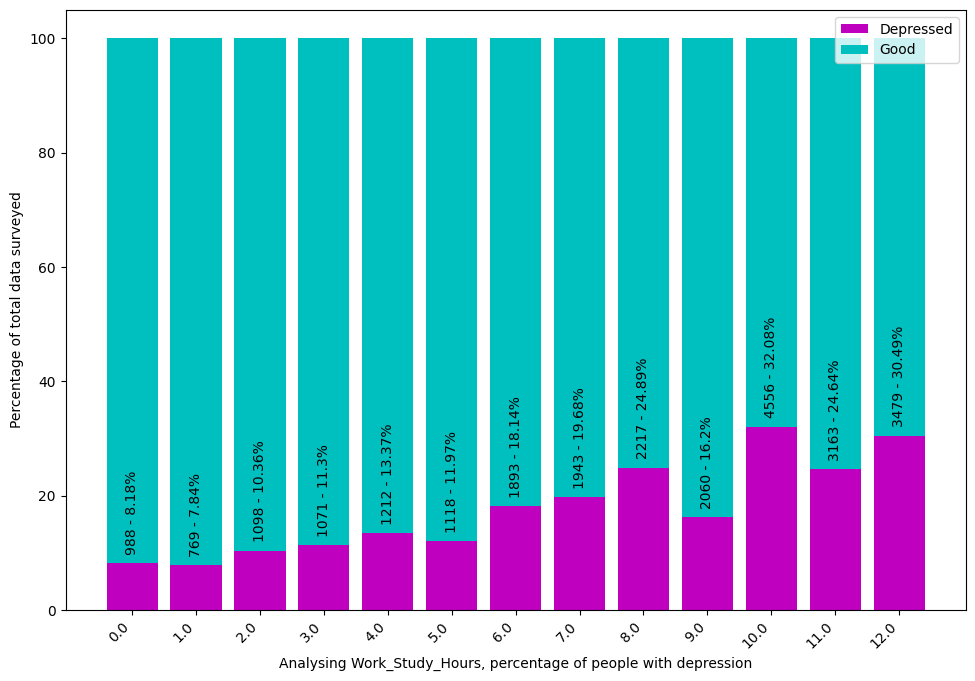

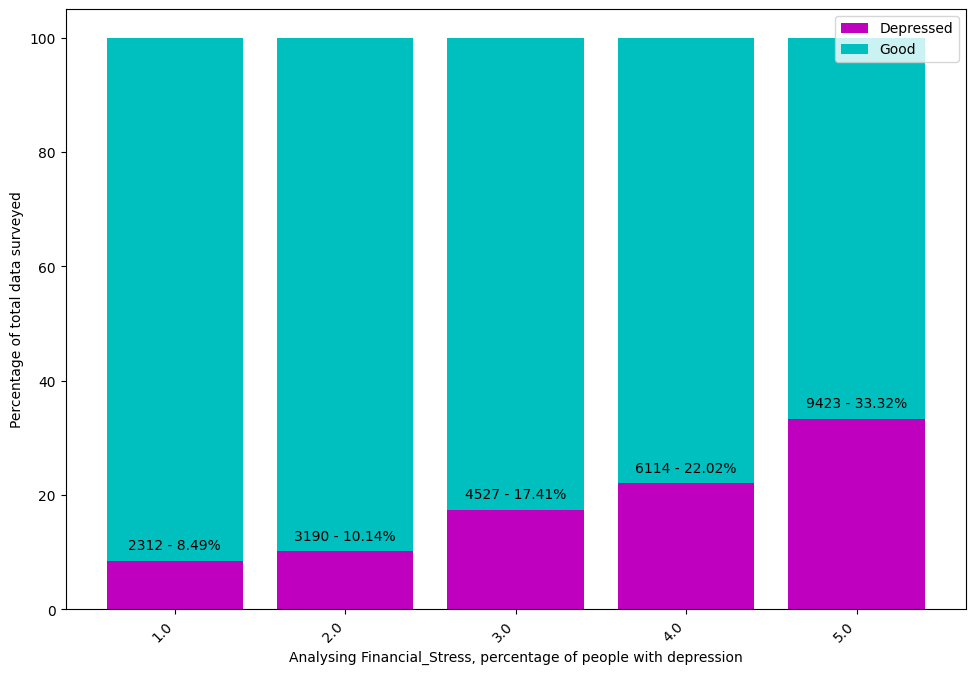

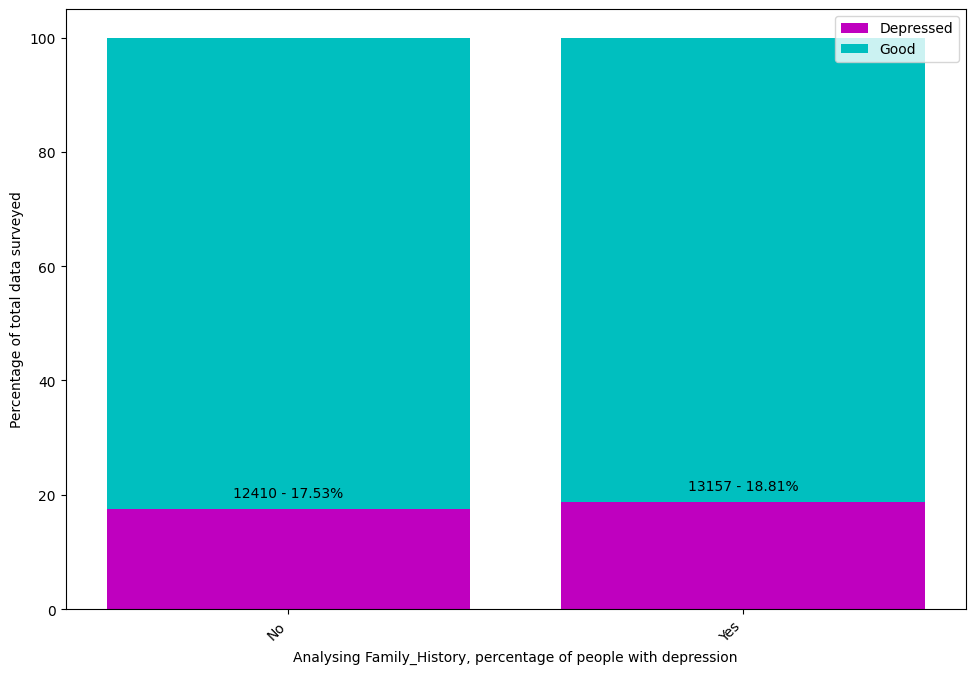

In [8]:
 
all_keys =  df.keys().to_list()

all_keys.remove('id')
all_keys.remove(TARGET)
# result['Gender']
# print(all_keys, result)


for key in all_keys:

    try :
            # result = df.groupby([key,TARGET]).value_count()
            figure = plt.figure(figsize=(10,8))
            axes = figure.add_axes([0.1,0.2,0.9, 0.75])
             
            axes.set_ylabel('Percentage of total data surveyed')
            axes.set_xlabel(f"Analysing {key}, percentage of people with depression")

            grouped_counts = df.groupby([key, TARGET])[TARGET].value_counts()
            df2 = grouped_counts.reset_index(name='Count')
            # print(df2)
            uq_list = df2[key].unique()
            # print(uq_list)
            names = []
            vals = []
            data_list = []
            dep_list = []
            rems = []
            for name in uq_list : 
               total = df2.loc[df2[key] == name, 'Count'].sum()
               if total < 10:
                    continue
               depressed = df2.loc[(df2[key] == name ) & (df2['Depression'] == 1), 'Count'].sum() 
               names.append(f"{name}") 
               dep_list.append(depressed)
            
               perc =math.floor(depressed*10000/total)/100
               vals.append(perc)    
               rems.append(100-perc)
               data_list.append([name,perc , depressed , total])
               print(f"{key} for {name:10} has  {perc:>6}% {depressed:>8}, {total:>8}")
            # axes.plot(names,vals,)
            axes.bar(names, vals,color='m',label="Depressed")
            axes.bar(names, rems,bottom=vals,  color='c',label="Good")
            axes.set_xticks(names)
            axes.set_xticklabels(names, rotation=45, ha='right')
            axes.legend(loc="upper right")
            # axes.set_yticklabels(vals);
            rot = 0
            if (len(vals)> 6):
                 rot = 90
            for i in range(0,len(vals)):
                axes.text(i,vals[i]+2,f"{dep_list[i]} - {vals[i]}%",ha="center", rotation=rot )

            target = f'../reports/{EXEC_MODE}/figures/{slugify(key)}.png'
            figure.savefig(target)
            print(f"Generated {target} chart")
            stats = pd.DataFrame(np.array(data_list),columns=[key,'Percentage','Depressed','Total'])
            # print(stats)
            stats.to_csv(f"../reports/{EXEC_MODE}/{slugify(key)}.csv",index=False)
            # if (key == 'City'):
            #      break
    except Exception as err:
        print("Error while",err)
    # break


    # plt.bar(depression_counts['Age'], depression_counts['Count'], color='skyblue')
 

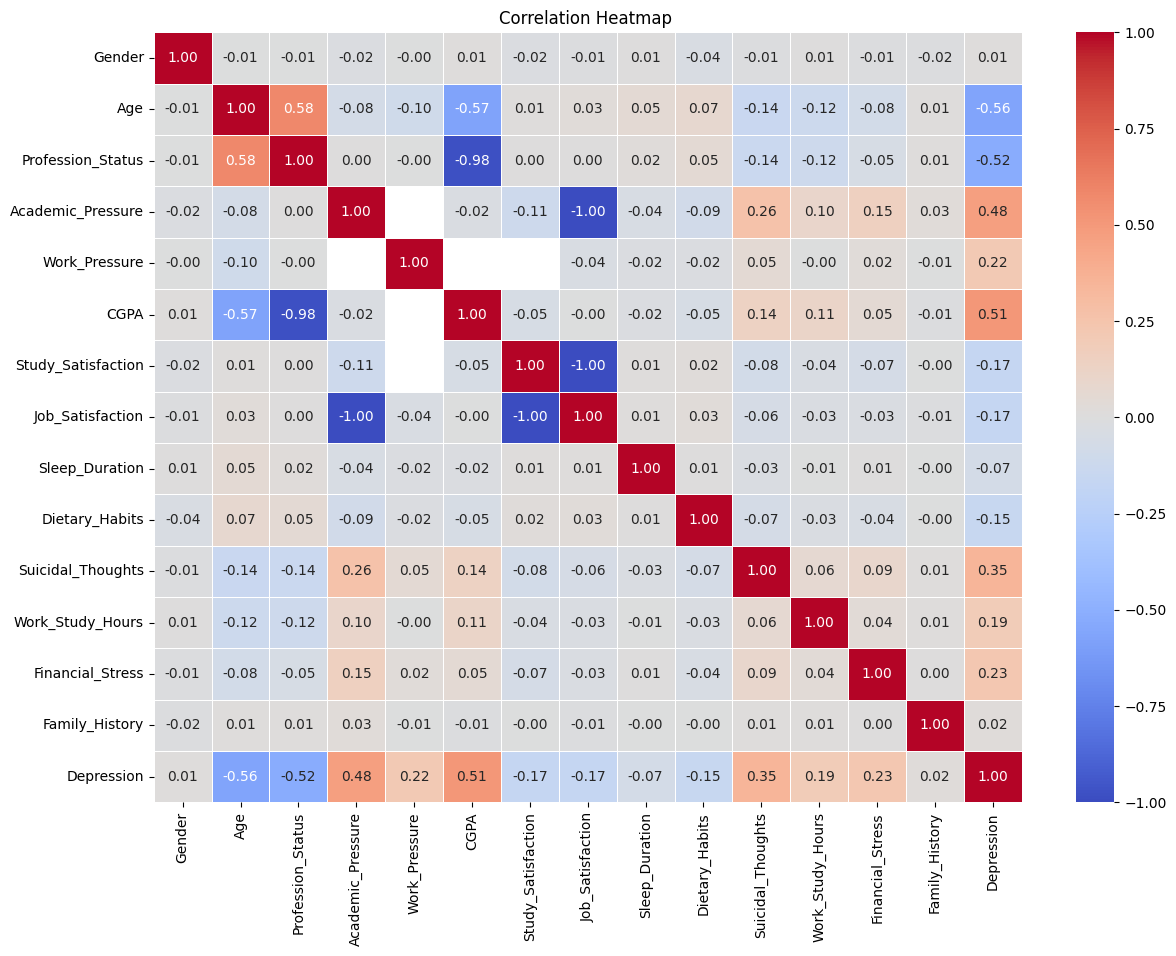

In [9]:
df2 = clean_str_data(df)
res = df2.corr()
# Set up the matplotlib figure
plt.figure(figsize=(14, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(res, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap ')
plt.savefig(f'../reports/{EXEC_MODE}/figures/corr.png')